<a href="https://colab.research.google.com/github/RafiKepecs/Bayesian-Machine-Learning/blob/main/Project%205%3A%20Expectation%20Maximization/BayesML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

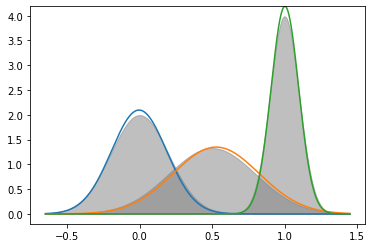

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.stats import norm, multivariate_normal

# PDF of Gaussian (Equation 9.15)
def likelihood(x, mu, var):
    rv = norm(mu, var)
    return rv.pdf(x)

# Expectation (Equation 9.23)
def E_step(mu, sig, pi, X):
    likelihoods = np.zeros((k, N*k))
    gamma = np.zeros((k, N*k))
    for i in range(k):
        likelihoods[i,:] = likelihood(X, mu[i], np.sqrt(sig[i]))  
    
    denom = [likelihoods[j,:] * pi[j] for j in range(k)]
    denom = np.sum(denom, axis=0)
    for i in range(k):    
        gamma[i,:]= (likelihoods[i,:] * pi[i]) / denom
    return gamma

# Maximization
def M_step(X, gamma):
    mu_hat = np.zeros(k)
    sig_hat = np.zeros(k)
    pi_hat = np.zeros(k)
    for i in range(k):
        #Equation 9.18
        N_k = np.sum(gamma[i,:])
        #Equation 9.24
        mu_hat[i] = 1/N_k * np.sum(gamma[i,:] * X)
        #Equation 9.25
        sig_hat[i] = 1/N_k * np.sum(gamma[i,:] * (X - mu_hat[i])**2)
        #Equation 9.26
        pi_hat[i] = N_k / N
    return mu_hat, sig_hat, pi_hat

# Log likelihood function
# 9.28
def log_likelihood(mu, sig, pi, X):
    a = 0
    for i in range(N*k):
        b = 0
        for j in range(k):
            b = b + ( pi[j] * likelihood(X[i], mu[j], sig[j]) )
        a = a + np.log(b)
    return a

k = 3

mu = [0, .5, 1]
sig = [.2, .3, .1]
N = 1000

X = [np.random.normal(mu[i], sig[i], N) for i in range(k)]
X = np.concatenate((X))

x = np.linspace(np.min(X),np.max(X),N)

pi_hat = [[1/6, 1/3, 1/2]]
mu_hat = [[.3, .4, .5]]
sig_hat = [[.15, .2, .25]]

epsilon = 1e-3
l_l_new = log_likelihood(mu_hat[0], sig_hat[0], pi_hat[0], X)
l_l_old = l_l_new + epsilon*2

#%%

# Number of epochs
epochs = 100

gamma = []

for e in range(epochs):
      
    gamma.append(E_step(mu_hat[e], sig_hat[e], pi_hat[e], X))
    a, b, c = M_step(X, gamma[e])
    mu_hat.append(a)
    sig_hat.append(b)
    pi_hat.append(c)
    

#%%
fig, ax = plt.subplots()

# Plot actual distributions
for i in range(k-1):
    plt.fill_between(x, likelihood(x, mu[i], sig[i]), color="grey", alpha=.5)
plt.fill_between(x, likelihood(x, mu[k-1], sig[k-1]), color="grey", alpha=.5)

# Initialize GMM distribution
lines = [ax.plot(x, likelihood(x, mu_hat[0][j], sig_hat[0][j]))[0]  for j in range(k)]


# Animation function
def animate(i):
    
    # Update distribution variable
    for j in range(k):
        lines[j].set_data(x, likelihood(x, mu_hat[i][j], np.sqrt(sig_hat[i][j])))
    
    return lines


# Create animation
anim = animation.FuncAnimation(fig, animate, frames = epochs, blit = True, repeat=True) 

# Save animation
anim.save('movie.mp4', writer = 'ffmpeg', fps = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


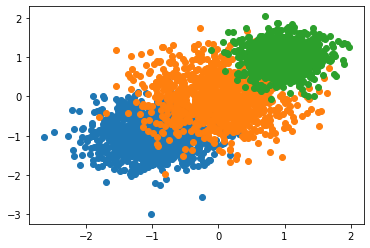

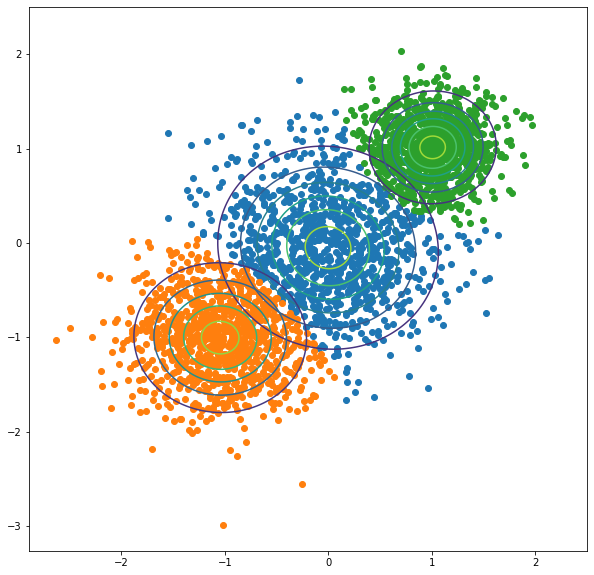

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.stats import norm, multivariate_normal

# PDF of Gaussian (Equation 9.15)
def likelihood(x, mu, var):
    rv = multivariate_normal(mu, var)
    return rv.pdf(x)

# Expectation (Equation 9.23)
def E_step(mu, sig, pi, X):
    likelihoods = np.zeros((k, N*k))
    gamma = np.zeros((k, N*k))
    for i in range(k):
        likelihoods[i,:] = likelihood(X, mu[i], sig[i])

    denom = [likelihoods[j,:] * pi[j] for j in range(k)]
    denom = np.sum(denom, axis=0)
    for i in range(k):
        gamma[i,:]= (likelihoods[i,:] * pi[i]) / denom
    return gamma

# Maximization
def M_step(X, gamma):
    mu_k = []
    sig_k = []
    pi_k = []
    for i in range(k):
        #Equation 9.18
        N_k = np.sum(gamma[i,:])
        #Equation 9.24
        mu_k.append((1/N_k * gamma[i,:] @ X).tolist())
        #Equation 9.25
        sig_k.append([[0,0],[0,0]])
        for j in range(N*k):
            a = (X[j] - mu_k[i]).reshape(2,1)
            b = gamma[i,j] * (a @ a.T)
            sig_k[i] = sig_k[i] + b
        
        sig_k[i] = (1/N_k * np.array(sig_k[i])).tolist()
        #Equation 9.26
        pi_k.append(N_k / N)
    return mu_k, sig_k, pi_k

# Log likelihood function
# 9.28
def log_likelihood(mu, sig, pi, X):
    a = 0
    for i in range(N*k):
        b = 0
        for j in range(k):
            b = b + ( pi[j] * likelihood(X[i], mu[j], sig[j]) )
            a = a + np.log(b)
    return a

k = 3

mu = [[-1,-1], [0,0], [1,1]]

sig = [[[.2,0],
        [0,.2]],

       [[.3,0],
        [0,.3]],

       [[.1,0],
        [0,.1]]]

N = 1000

RV = [multivariate_normal(mu[i], sig[i]) for i in range(k)]
X_ind = [rv.rvs(N) for rv in RV] # Points generated for each set of parameters
[plt.scatter(x[:,0], x[:,1]) for x in X_ind] # Plot original distributions
X = np.concatenate((X_ind)) # All generated points

x = np.linspace(np.min(X),np.max(X),N)

mu_hat = [[[0.2,0.2], [.1,.1], [.3,.3]]]

sig_hat = [[[[.2,0],
[0,.2]],

[[.3,0],
[0,.3]],

[[.1,0],
[0,.1]]]]

pi_hat = [[1/6, 1/3, 1/2]]


#%% Find distributions

# Number of epochs
epochs = 100

gamma = []

for e in range(epochs):

    gamma.append(E_step(mu_hat[e], sig_hat[e], pi_hat[e], X))
    a, b, c = M_step(X, gamma[e])
    mu_hat.append(a)
    sig_hat.append(b)
    pi_hat.append(c)
    
    
#%% Plot estimated distributions

RVs_estimated = [multivariate_normal(mu_hat[-1][i], sig_hat[-1][i]) for i in range(k)]

x = np.linspace(-2.5, 2.5, 500)
y = np.linspace(-2.5, 2.5, 500)
x,y = np.meshgrid(x, y)

pos = np.array([x.flatten(),y.flatten()]).T

fig = plt.figure(figsize=(10,10))

for i in range(k):
    rv = RVs_estimated[i]
    ax0 = fig.add_subplot(111)
    ax0.contour(x, y, rv.pdf(pos).reshape(500,500))
    

#%% Plot data classified by the estimated distributions

gamma_final = gamma[-1]

X_sorted = [[] for i in range(k)]

for j in range(N*k):
    max_likelihood = 0
    i = np.argmax(gamma_final[:,j])
    X_sorted[i].append(X[j])
    
X_sorted = [np.array(x) for x in X_sorted]

[plt.scatter(x[:,0], x[:,1]) for x in X_sorted] # Plot original distributions
